# Assignment 3: Tree Search

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parents. 
* Depth-limited search needs ideas from best-first search to work with open spaces!



Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (8, 1).
Position(0,0): X
Position(8,1):  


<Figure size 640x480 with 0 Axes>

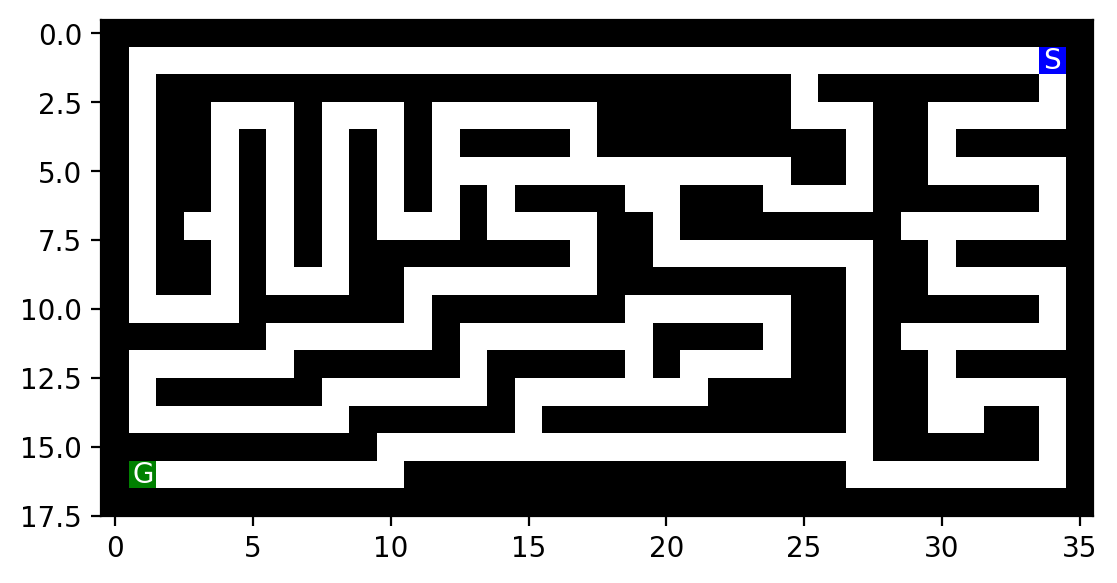

In [71]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

In [72]:
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)
    
 
# Given a list of mazes, will return an animation of the search
# Based on show_maze but modified to generate animation
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes."""
        
        if result['path'] != None:       
            print(f"Path length: {len(result['path'])-1}")
            print(f"Reached squares: {len(result['reached'])}")
            print(f"Action sequence: {result['actions']}")
        else:
            print("No solution found.")
        
        
        mazes = result['maze_anim']
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = find_pos(mazes[0], 'G')
        start = find_pos(mazes[0], 'S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani


## Implementation

In [73]:
# tree_search.py has my actual implementation
from tree_search_solution import *
import tree_search_solution as tree_search

### Heuristics

Heuristics $h(n)$

In [74]:
def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
print(manhattan((0,0), (1,1)))

2


In [75]:
def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

print(euclidean([0,0], [1,1]))

1.4142135623730951


In [76]:
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

## Experiments

### BFS

I use a best-first search implementation with FIFO frontier.

In [77]:
tree_search.set_order("NESW")
#tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 38.5 ms, sys: 32 ms, total: 70.5 ms
Wall time: 32.8 ms
Path length: 68
Reached squares: 269
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [78]:
#tree_search.set_order("NESW")
tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 31 ms, sys: 134 µs, total: 31.2 ms
Wall time: 30.1 ms
Path length: 68
Reached squares: 269
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


The order in which we add to the frontier in the expand function makes no difference for BFS.

### DFS with no reached data structure

This has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

In [79]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 12.5 ms, sys: 4.03 ms, total: 16.5 ms
Wall time: 15.6 ms
Path length: 152
Reached squares: 161
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [80]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 18.8 ms, sys: 124 µs, total: 18.9 ms
Wall time: 18.3 ms
Path length: 174
Reached squares: 182
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 

In [81]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 34.6 ms, sys: 116 µs, total: 34.8 ms
Wall time: 33.6 ms
Path length: 224
Reached squares: 263
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'N', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'W', 'W', 'N', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W'

The order in which we expand the frontier makes a big difference for DFS. However, the best order depends on the maze.
Randomization with multiple restarts is probably a good idea.


We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 834 ms, sys: 3.65 ms, total: 838 ms
Wall time: 837 ms
Solutions have path_lengths of [122, 76, 76, 114, 76, 74, 114, 154, 130, 130, 224, 76, 76, 152, 130, 164, 76, 164, 122, 74, 152, 76, 68, 74, 130, 130, 70, 162, 130, 74, 76, 74, 76, 130, 74, 104, 156, 74, 234, 112, 76, 74, 76, 164, 76, 234, 68, 74, 130, 76, 246, 76, 114, 236, 174, 74, 68, 154, 164, 74, 154, 224, 130, 224, 134, 70, 142, 162, 142, 134, 130, 74, 104, 130, 110, 70, 74, 74, 70, 130, 76, 124, 232, 102, 76, 68, 246, 122, 174, 152, 122, 130, 164, 152, 164, 116, 68, 76, 104, 76]
Path length: 68
Reached squares: 0


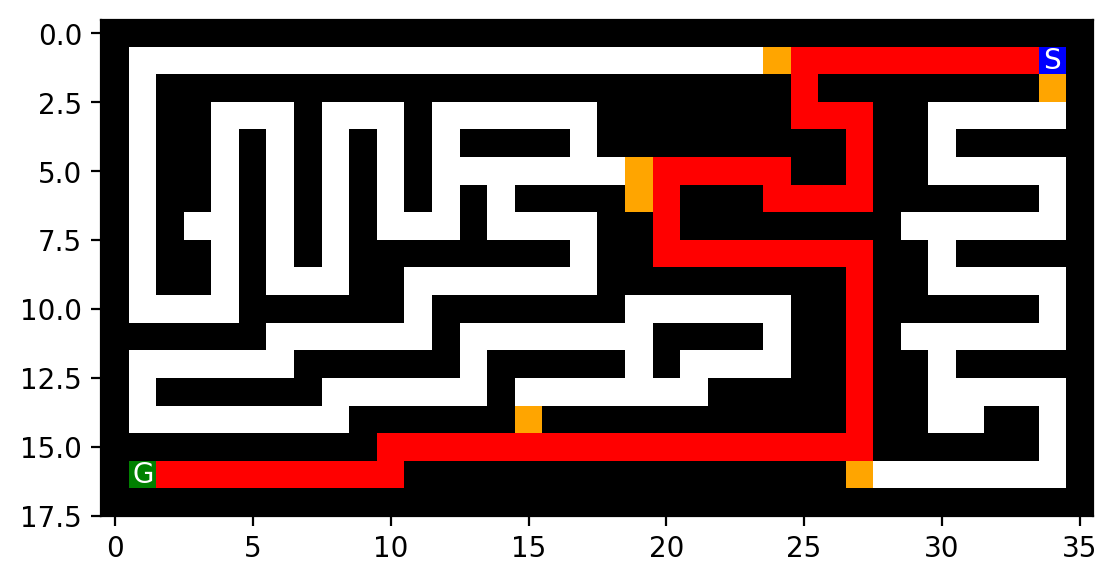

In [82]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

DFS does not store the explored search tree for visualization so we show it using the tree search implementation.

In [83]:
tree_search.set_order(random = True)

#%time result = DFS(maze, limit = 10, debug = False, vis = False)
%time result = best_first_search(maze, strategy = "DFS", limit = 5, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 779 µs, sys: 36 µs, total: 815 µs
Wall time: 689 µs
No solution found.


Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 789 µs, sys: 36 µs, total: 825 µs
Wall time: 783 µs
Reached squares: 11


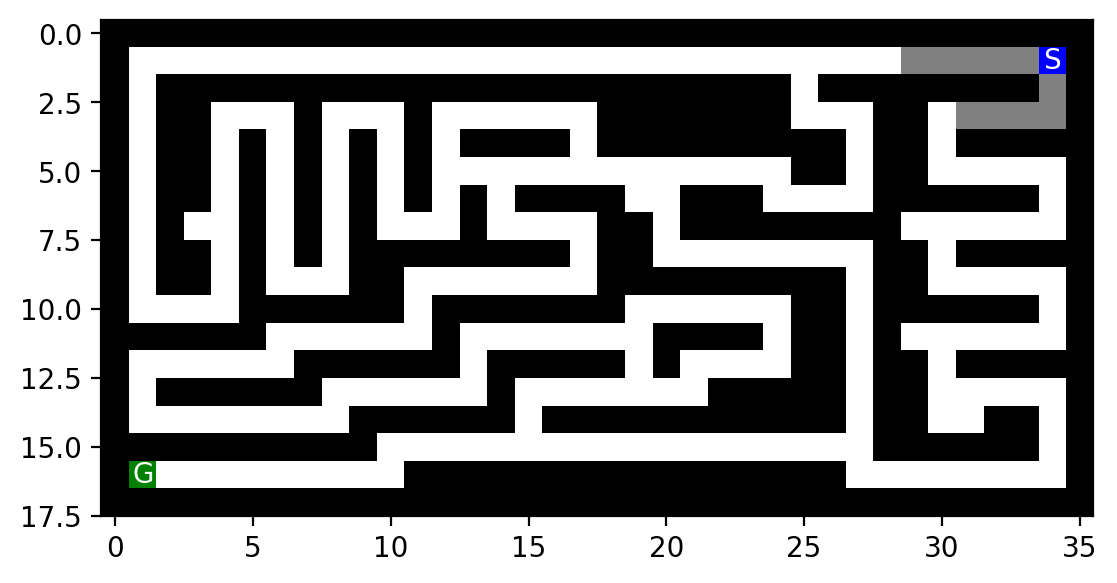

No solution found.


In [84]:
#tree_search.set_order(random=True)
tree_search.set_order("NESW")

%time result = DFS(maze, limit = 5, vis = False, debug_reached = True, animation = True)

show_path(maze, result)

animate_maze(result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 291 ms, sys: 121 µs, total: 291 ms
Wall time: 290 ms
Path length: 68
Reached squares: 0


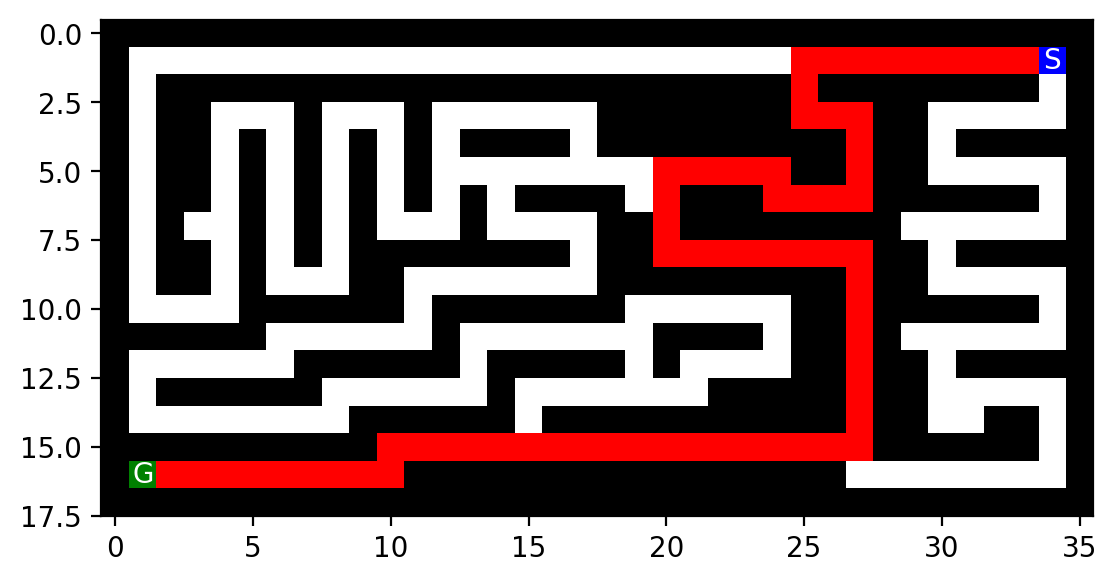

In [85]:
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 187 ms, sys: 24.2 ms, total: 212 ms
Wall time: 185 ms
Path length: 68
Reached squares: 270


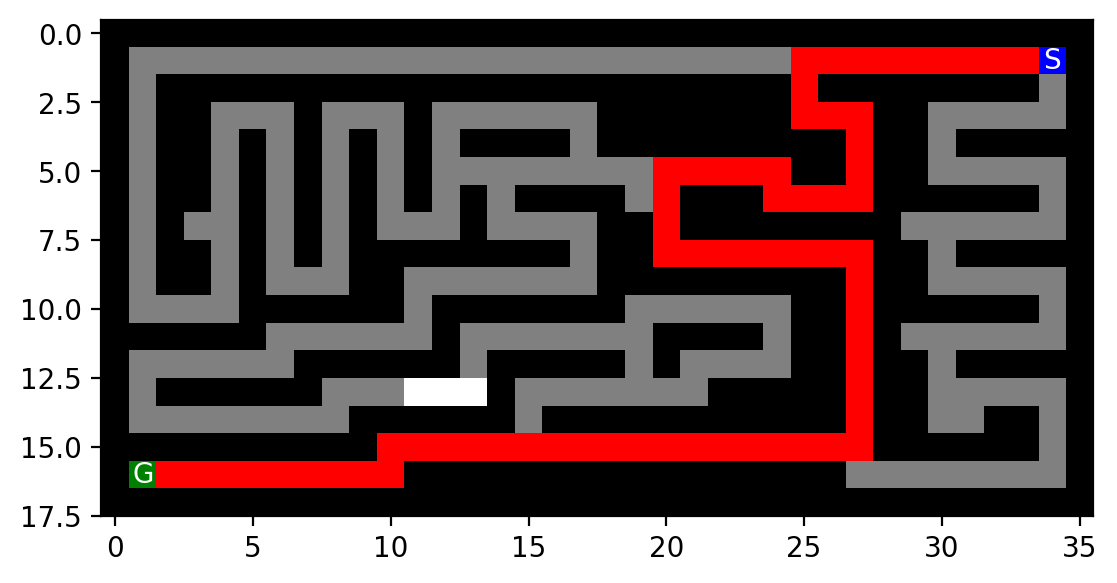

In [86]:
# Use a reached structure. This does not use DFS in the proper way.

#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS_reached(maze, debug = False)
show_path(maze, result)

### GBFS

In [87]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 46 ms, sys: 91 µs, total: 46.1 ms
Wall time: 44.5 ms
Path length: 152
Reached squares: 163
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'S', 'S', 'S', 'S', 'E', 'E', 'N', 'N', 'E', 'E', 'S', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [88]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 7.15 ms, sys: 0 ns, total: 7.15 ms
Wall time: 6.72 ms
Path length: 74
Reached squares: 81
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [89]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 15.2 ms, sys: 0 ns, total: 15.2 ms
Wall time: 14.4 ms
Path length: 74
Reached squares: 81
Action sequence: ['S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


### A* Search

In [90]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 24.3 ms, sys: 11 µs, total: 24.3 ms
Wall time: 23.2 ms
Path length: 68
Reached squares: 223
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [91]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 26.9 ms, sys: 135 µs, total: 27 ms
Wall time: 26 ms
Path length: 68
Reached squares: 226
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'E', 'S', 'S', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 6.9 ms, sys: 0 ns, total: 6.9 ms
Wall time: 6.34 ms
Path length: 14
Reached squares: 36
Action sequence: ['W', 'S', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S']


### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

In [ ]:
tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 1.52 ms, sys: 65 µs, total: 1.58 ms
Wall time: 1.59 ms
Path length: 14
Reached squares: 38
Action sequence: ['W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S']


In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 1.33 ms, sys: 57 µs, total: 1.38 ms
Wall time: 1.39 ms
Path length: 14
Reached squares: 39
Action sequence: ['S', 'S', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W']


In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 1.51 ms, sys: 0 ns, total: 1.51 ms
Wall time: 1.54 ms
Path length: 14
Reached squares: 35
Action sequence: ['W', 'S', 'S', 'S', 'W', 'W', 'S', 'W', 'S', 'S', 'W', 'S', 'W', 'W']


$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = 1-1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 22.3 ms, sys: 0 ns, total: 22.3 ms
Wall time: 21.4 ms
Path length: 14
Reached squares: 91
Action sequence: ['W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S']


In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 18.9 ms, sys: 3.96 ms, total: 22.8 ms
Wall time: 22.3 ms
Path length: 14
Reached squares: 94
Action sequence: ['S', 'S', 'W', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W']
